In [5]:
%%writefile cmc.py
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def show_cmc(my_method_name,title,rank_no,cmc_dict):
    color = ['g','b','c','m','y','orange','brown']
    marker = ['o','s','v','X','*','.','P']
    fig, ax = plt.subplots()
    fig.suptitle(title)
    x = list(range(0, rank_no+1, 5))
    plt.ylim(0, 1.0)
    plt.xlim(1, rank_no)
    plt.xlabel('Rank')
    plt.ylabel('Matching Rates (%)')
    plt.xticks(x)
    plt.grid(True)

    method_name = []
    i = 0
    for name in cmc_dict.keys():
        if rank_no < len(cmc_dict[name]):
            temp_cmc = cmc_dict[name][:rank_no]
            r = list(range(1, rank_no+1))
        else:
            temp_cmc = cmc_dict[name]
            r = list(range(1, len(temp_cmc)+1))
        if name == my_method_name:
            globals()[name] = mlines.Line2D(r, temp_cmc, color='r', marker='*', label='{:.1f}% '.format(cmc_dict[name][0]*100)+name)
        else:
            globals()[name] = mlines.Line2D(r, temp_cmc, color=color[i], marker=marker[i], label='{:.1f}% '.format(cmc_dict[name][0]*100)+name)
            i = i+1
        ax.add_line(globals()[name])
        method_name.append(globals()[name])

    plt.legend(handles=method_name)
    plt.show()
    
def save_cmc(my_method_name,title,rank_no,cmc_dict, save_dir, dpi=500, file_type='eps'):
    color = ['g','b','c','m','y','orange','brown']
    marker = ['o','s','v','X','*','.','P']
    fig, ax = plt.subplots()
    fig.suptitle(title)
    x = list(range(0, rank_no+1, 5))
    plt.ylim(0, 1.0)
    plt.xlim(1, rank_no)
    plt.xlabel('Rank')
    plt.ylabel('Matching Rates (%)')
    plt.xticks(x)
    plt.grid(True)

    method_name = []
    i = 0
    for name in cmc_dict.keys():
        if rank_no < len(cmc_dict[name]):
            temp_cmc = cmc_dict[name][:rank_no]
            r = list(range(1, rank_no+1))
        else:
            temp_cmc = cmc_dict[name]
            r = list(range(1, len(temp_cmc)+1))
        if name == my_method_name:
            globals()[name] = mlines.Line2D(r, temp_cmc, color='r', marker='*', label='{:.1f}% '.format(cmc_dict[name][0]*100)+name)
        else:
            globals()[name] = mlines.Line2D(r, temp_cmc, color=color[i], marker=marker[i], label='{:.1f}% '.format(cmc_dict[name][0]*100)+name)
            i = i+1
        ax.add_line(globals()[name])
        method_name.append(globals()[name])

    plt.legend(handles=method_name)
    fig.savefig(save_dir+'/'+title, dpi=dpi, format=file_type)

Overwriting cmc.py


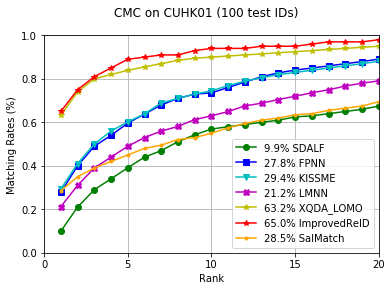

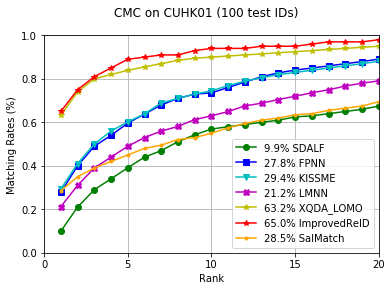

In [6]:
%matplotlib inline
my_method_name = 'ImprovedReID'
title = 'CMC on CUHK01 (100 test IDs)'
rank_no = 20
save_dir = './'

cmc_dict ={
    'ImprovedReID': [0.65, 0.75, 0.81, 0.85, 0.89, 0.90, 0.91, 0.91, 0.93, 0.94, 0.94, 0.94, 0.95, 0.95, 0.95, 0.96, 0.97, 0.97, 0.97, 0.98],
    'KISSME': [0.294, 0.41, 0.5, 0.56, 0.6018, 0.6390, 0.6891, 0.71, 0.73, 0.7444, 0.7694, 0.7894, 0.805, 0.8195, 0.8295, 0.8396, 0.8497, 0.8597, 0.8697, 0.8808],
    'FPNN': [0.278, 0.4, 0.49, 0.54, 0.5964, 0.6380, 0.68, 0.71, 0.73, 0.7353, 0.7604, 0.7854, 0.810, 0.8275, 0.8405, 0.8496, 0.8597, 0.8697, 0.8797, 0.8908],
    'LMNN': [0.2118, 0.31, 0.39, 0.44, 0.49, 0.530, 0.56, 0.581, 0.613, 0.6298, 0.65, 0.67554, 0.68810, 0.705, 0.72, 0.736, 0.7497, 0.767, 0.78, 0.7908],
    'SDALF': [0.099, 0.21, 0.29, 0.34, 0.3912, 0.440, 0.47, 0.511, 0.543, 0.569, 0.58, 0.59, 0.60, 0.61, 0.625, 0.63, 0.64, 0.65, 0.66, 0.675],
    'SalMatch': [0.285, 0.35, 0.39, 0.42, 0.45, 0.480, 0.495, 0.521, 0.53, 0.55, 0.575, 0.595, 0.61, 0.62, 0.635, 0.64, 0.655, 0.665, 0.675, 0.695],
    'XQDA_LOMO': [0.632, 0.74, 0.80, 0.82, 0.839, 0.855, 0.87, 0.885, 0.895, 0.90, 0.905, 0.91, 0.915, 0.92, 0.925, 0.93, 0.935, 0.94, 0.945, 0.95]
}

show_cmc(my_method_name,title,rank_no,cmc_dict)
save_cmc(my_method_name,title,rank_no,cmc_dict,save_dir)